# Dual Numbers.

Dual numbers have the form
z = a + b ε    with ε<sup>2</sup> = 0

Similar to complex numbers.
* a = real(z) is the real part, and
* b = dual(z) is the dual part.


Thanks to Gino van den Bergen for all his gdc talks.
http://www.dtecta.com/publications


In [8]:
class DualNumber(object):
    
    def __init__(self, real, dual=0):
        self.real = real
        self.dual = dual
        
    def __add__(self, other):
        if isinstance(other, DualNumber):
            return DualNumber(self.real + other.real, self.dual + other.dual)
        return DualNumber(self.real + other, self.dual)
    
    def __sub__(self, other):
        if isinstance(other, DualNumber):
            return DualNumber(self.real - other.real, self.dual - other.dual)
        return DualNumber(self.real - other, self.dual)
    
    def __mul__(self, other):
        if isinstance(other, DualNumber):
            dual = self.dual * other.real
            dual += self.real * other.dual
            real = self.real * other.real
            return DualNumber(real, dual)
        return DualNumber(self.real * other, self.dual * other)
    
    def __truediv__(self, other):
        if isinstance(other, DualNumber):
            real = self.real / other.real
            dual = self.dual - (real * other.dual)
            dual /= other.real
            return DualNumber(real, dual)
        return DualNumber(self.real / other, self.dual / other)
    
    def __repr__(self):
        return '({} + {}ε)'.format(self.real, self.dual)
        

## Taylor Series

Any value f(a + h) of a smooth function f
can be expressed as an infinite sum:

f(a+h)=f(a) + f'+h/1! + f''+h<sup>2</sup>/2! + ...

where f’, f’’, ..., f (n) are the first, second, ...,
n-th derivative of f.

## Taylor Series and Dual Numbers
For f(a + bε), the Taylor series is:

f(a + bε) = f(a) + f'+bε/1! + ... 0

* All second- and higher-order terms vanish!
* We have a closed-form expression that holds the function and its derivative.

## Real Functions on Dual Numbers
Any differentiable real function f can be
extended to dual numbers, as:

* f(a + b ε) = f(a) + b f’(a) ε
* For example,
    sin(a + b ε) = sin(a) + b cos(a) ε
    
## Automatic Differentiation

* Add a unit dual part to the input value of
    a real function.
* Evaluate function using dual arithmetic.
* The output has the function value as real
    part and the derivate’s value as dual part:

f(a + ε) = f(a) + f’(a) ε

In [16]:
#let's try a few function to check their derivate

def function(x):
    #line function ax+b
    return DualNumber(5) * x + DualNumber(2)

#f'(x) = 5

print ("As numbers, no derivate")
print ( function(0) )
print ( function(1) )
print ( function(2) )

print ("As dualnumber, with derivate (expecting constant derivate for a line)")
print ( function(DualNumber(0,1)) )
print ( function(DualNumber(1,1)) )
print ( function(DualNumber(2,1)) )

As numbers, no derivate
(2 + 0ε)
(7 + 0ε)
(12 + 0ε)
As dualnumber, with derivate (expecting constant derivate for a line)
(2 + 5ε)
(7 + 5ε)
(12 + 5ε)


In [17]:
#let's try a few function to check their derivate

def function(x):
    return DualNumber(5) * x * x + DualNumber(2) * x + DualNumber(1)

#f'(x) = 2*5x + 2

print ( function(DualNumber(0,1)) )
print ( function(DualNumber(1,1)) )
print ( function(DualNumber(2,1)) )

(1 + 2ε)
(8 + 12ε)
(25 + 22ε)


In [21]:
#let's try a few function to check their derivate

def function(x):
    a = DualNumber(2) * x * x - DualNumber(3) * x
    return a*a + DualNumber(1)

#f(x) = (2x^2 - 3x)(2x^2 - 3x) + 1
#f(x) = 4x^4 - 12x^3 + 9x^2 + 1
#f'(x) = 16x^3 - 36x^2 + 18x



print ( function(DualNumber(0,1)) )
print ( function(DualNumber(1,1)) )
print ( function(DualNumber(2,1)) )

(1 + 0ε)
(2 + -2ε)
(5 + 20ε)


## dual number functions

using the 
f(a + b ε) = f(a) + b f’(a) ε

let's populate all the method for dual numbers


In [26]:
import math

def dConj(a):
    return DualNumber(a.real, -a.dual)

def dAcos(a):
    return DualNumber(math.acos(a.real), -a.dual() / math.sqrt(1.0 - a.real*a.real))

def dAsin(a):
    return DualNumber(math.asin(a.real), a.dual() / math.sqrt(1.0 - a.real*a.real))

def dAtan(a):
    return DualNumber(math.atan(a.real), a.dual() / (1.0 + a.real*a.real))

def dAtan2(x, y):
    z = y/x
    quandrant = 0.0
    if x.real < 0:
        if y.real < 0 :
            quadrant = -3.141695
        else:
            quadrant = 3.141695
    return DualNumber(math.atan(z.real) + quandrant, z.dual() / (1.0 + z.real*z.real))

def dCos(a):
    return DualNumber(math.cos(a.real), -a.dual * math.sin(a.real))

def dCosh(a):
    return DualNumber(math.cosh(a.real), a.dual * math.sinh(a.real))

def dExp(a):
    x = math.exp(a.real)
    return DualNumber(x, a.dual * x)

def dLog(a):
    return DualNumber(math.log(a.real), a.dual/a.real )

def dLog10(a):
    return dLog(x) / math.log(10)

def dPow(a, b):
    return dExp(dLog(a) * b)

def dSin(a):
    return DualNumber(math.sin(a.real), a.dual * math.cos(a.real))

def dSinh(a):
    return DualNumber(math.sinh(a.real), a.dual * math.cosh(a.real))

def dSqrt(a):
    x = math.sqrt(a.real)
    return DualNumber(x, a.dual / (2.0*x))

def dTan(a):
    x = math.tan(a.real)
    return DualNumber(x, a.dual * (1.0 + x*x))

def dTahnh(a):
    x = math.thanh(a.real)
    return DualNumber(x, a.dual * (1.0 - x*x))

### plot some graphs

Let's try a complex function to check the derivative functions


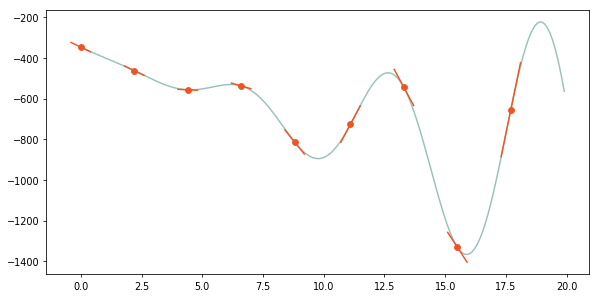

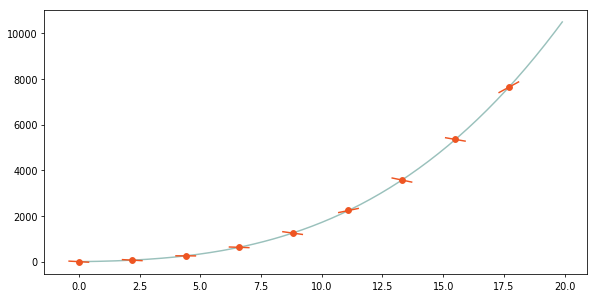

In [58]:
import matplotlib.pyplot as plt

def functionOne(x):
    return DualNumber(2) *x*x * dCos(x) - dSqrt(x + DualNumber(3)) * DualNumber(200)

def functionTwo(x):
    return dPow( DualNumber(2) + x, DualNumber(3) )

def graphFunctionAndDerivate(func, derivateCount=9):

    xs = [x*0.1 for x in range(0,200)]
    ys = [func(DualNumber(x)).real for x in xs]

    plt.figure(figsize=(10, 5), dpi=70)
    plt.plot(xs, ys, color='#9ac1bc')

    for t in range(derivateCount):
        x = xs[(t * 200)//derivateCount]
        y = ys[(t * 200)//derivateCount]
        slope = function(DualNumber(x,1)).dual

        plt.plot([x-0.4, x+0.4], [y-slope*0.4, y+slope*0.4], color='#ee5522')
        plt.plot([x], [y], 'o', color='#ee5522')

    plt.show()
    

    
graphFunctionAndDerivate(functionOne)
graphFunctionAndDerivate(functionTwo)